<a href="https://colab.research.google.com/github/cisco00/Black-Politician-and-bicyclist-counts-/blob/main/Black_Politician.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**The experiment sought to determine whether the effect of the email being from "out-of-district" (someone who can't vote for you and so provides no extrinsic motivation to reply) would have a smaller effect on response rates for Black legislators than for non-Black ones, providing evidence of additional intrinsic motivation on the part of Black legislators to help Black people.**

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn import preprocessing
import statsmodels.api as sm

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [ ]:
black_ = pd.read_csv("/content/black_politicians.csv")
black_

,Unnamed: 0,leg_black,treat_out,responded,totalpop,medianhhincom,black_medianhh,white_medianhh,blackpercent,statessquireindex,nonblacknonwhite,urbanpercent,leg_senator,leg_democrat,south
0,1,0,0,0,1.5873,5.0625,2.6814,2.6586,0.007119,0.227,0,0.695602,0,0,0
1,2,0,0,1,1.6218,4.9713,2.7126,2.6619,0.005796,0.227,0,0.618073,0,0,0
2,3,0,0,1,1.6710,6.9646,2.3087,2.9973,0.012029,0.227,0,0.824331,0,0,0
3,4,0,0,1,1.6122,4.1811,2.4668,2.4887,0.004280,0.227,1,0.000000,0,0,0
4,5,0,1,1,1.5622,3.1152,2.1490,2.0597,0.008258,0.227,1,0.000000,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5588,5589,0,0,1,0.8659,5.1551,0.0000,1.9969,0.001155,0.054,0,0.129601,0,0,0
5589,5590,0,0,1,0.8809,3.6007,1.8000,2.0522,0.001816,0.054,0,0.766419,0,0,0
5590,5591,0,0,1,0.8549,3.1691,2.3880,1.8572,0.002339,0.054,0,0.960742,0,0,0
5591,5592,0,1,1,0.7980,3.1230,1.9344,1.6388,0.004762,0.054,0,0.957553,0,1,0


**Checking for the information of the dataset**

In [ ]:
black_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5593 entries, 0 to 5592
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         5593 non-null   int64  
 1   leg_black          5593 non-null   int64  
 2   treat_out          5593 non-null   int64  
 3   responded          5593 non-null   int64  
 4   totalpop           5593 non-null   float64
 5   medianhhincom      5593 non-null   float64
 6   black_medianhh     5593 non-null   float64
 7   white_medianhh     5593 non-null   float64
 8   blackpercent       5593 non-null   float64
 9   statessquireindex  5593 non-null   float64
 10  nonblacknonwhite   5593 non-null   int64  
 11  urbanpercent       5593 non-null   float64
 12  leg_senator        5593 non-null   int64  
 13  leg_democrat       5593 non-null   int64  
 14  south              5593 non-null   int64  
dtypes: float64(7), int64(8)
memory usage: 655.6 KB


**Checking for missing values in dataset**

In [ ]:
black_.isna().sum()

Unnamed: 0           0
leg_black            0
treat_out            0
responded            0
totalpop             0
medianhhincom        0
black_medianhh       0
white_medianhh       0
blackpercent         0
statessquireindex    0
nonblacknonwhite     0
urbanpercent         0
leg_senator          0
leg_democrat         0
south                0
dtype: int64

****Dropping columns that are not needed for computing model****

In [ ]:
black = black_.drop(columns=['Unnamed: 0'], axis=1)

In [ ]:
black.describe()

,leg_black,treat_out,responded,totalpop,medianhhincom,black_medianhh,white_medianhh,blackpercent,statessquireindex,nonblacknonwhite,urbanpercent,leg_senator,leg_democrat,south
count,5593.000000,5593.000000,5593.000000,5593.000000,5593.000000,5593.000000,5593.000000,5593.000000,5593.000000,5593.000000,5593.000000,5593.000000,5593.000000,5593.000000
mean,0.065081,0.496871,0.422850,8.553139,4.362990,1.559966,2.318342,0.092231,0.190194,0.047202,0.678290,0.263901,0.531736,0.269086
std,0.246691,0.500035,0.494056,10.787865,1.409283,0.989874,0.759254,0.154456,0.122848,0.212089,0.318959,0.440786,0.499036,0.443525
min,0.000000,0.000000,0.000000,0.302600,1.728300,-0.117600,0.948200,0.000301,0.027000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,2.660900,3.322700,1.073300,1.820100,0.007702,0.116000,0.000000,0.424863,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,4.903900,4.059600,1.413200,2.126900,0.026234,0.169000,0.000000,0.775239,0.000000,1.000000,0.000000
75%,0.000000,1.000000,1.000000,11.554600,5.134700,1.896600,2.610200,0.097552,0.223000,0.000000,0.985386,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,90.565700,13.677400,37.811500,10.660500,0.974497,0.626000,1.000000,1.000000,1.000000,1.000000,1.000000


***From the above chart we can see that there is outlier in totalpop and black_medianhh, black_medianhh, white_medianhh, nonblacknonwhite in that the difference between the min and max score is very sparse apart***

**Removing outliers**

In [ ]:
q_low = black["medianhhincom"].quantile(0.01)
q_hi  = black["medianhhincom"].quantile(0.99)
df_filtered = black[(black["medianhhincom"] < q_hi) & (black["medianhhincom"] > q_low)]

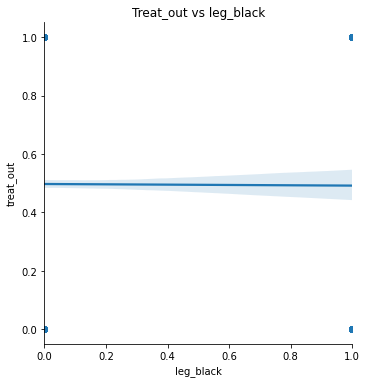

In [ ]:
fig=sns.lmplot(x='leg_black',y='treat_out',data=black)
plt.title("Treat_out vs leg_black")
plt.show()

**The graph above shows the number of black legislator that got the email from out of district**

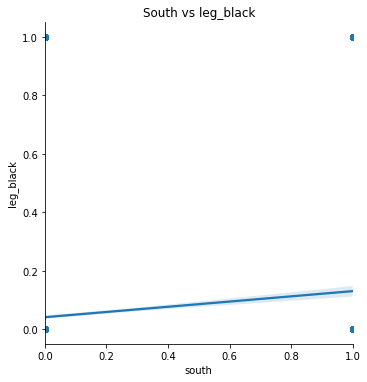

In [ ]:
fig=sns.lmplot(x='south',y='leg_black',data=black)
plt.title("South vs leg_black")
plt.show()

**The graph shows the percentage of black politician from southern United State**

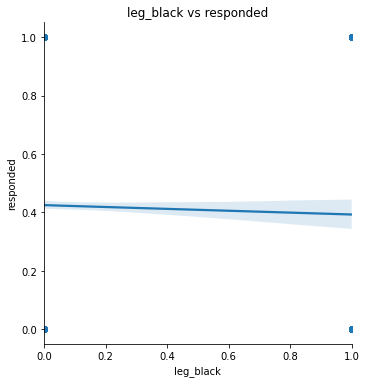

In [ ]:
fig=sns.lmplot(x='leg_black',y='responded',data=black)
plt.title("leg_black vs responded")
plt.show()

**The graph shows the percentage of black legislator that responded to the email despite the raise in the numbers of black legislator in Southern United state**

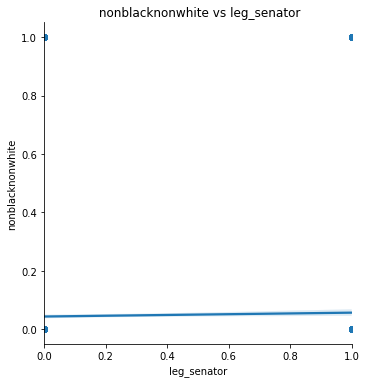

In [ ]:
fig=sns.lmplot(x='leg_senator',y='nonblacknonwhite',data=black)
plt.title(" nonblacknonwhite vs leg_senator")
plt.show()

**The graph shows the percentage number of neither white nor black senators that receive the email**

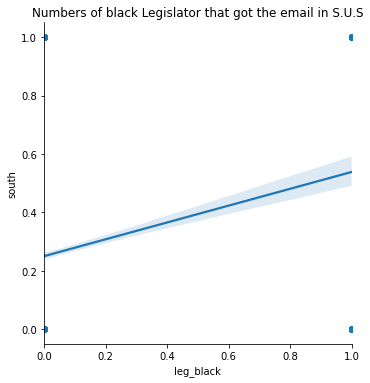

In [ ]:
fig=sns.lmplot(x='leg_black',y='south',data=black)
plt.title("Numbers of black Legislator that got the email in S.U.S")
plt.show()

****Number of black legislator in southern United State that got the email****

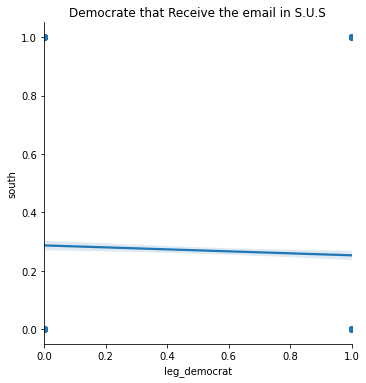

In [ ]:
fig=sns.lmplot(x='leg_democrat',y='south',data=black)
plt.title("Democrate that Receive the email in S.U.S")
plt.show()

**The numbers of democrate in south U.S that got the email**

Text(0.5, 0, 'response')

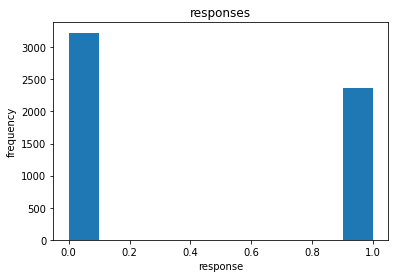

In [ ]:
plt.hist(black['responded'])
plt.title("responses")
plt.ylabel("frequency")
plt.xlabel("response")

**The chart above show the numbers of respondent to the email being sent accross**

****Checking for correaltion among variables****

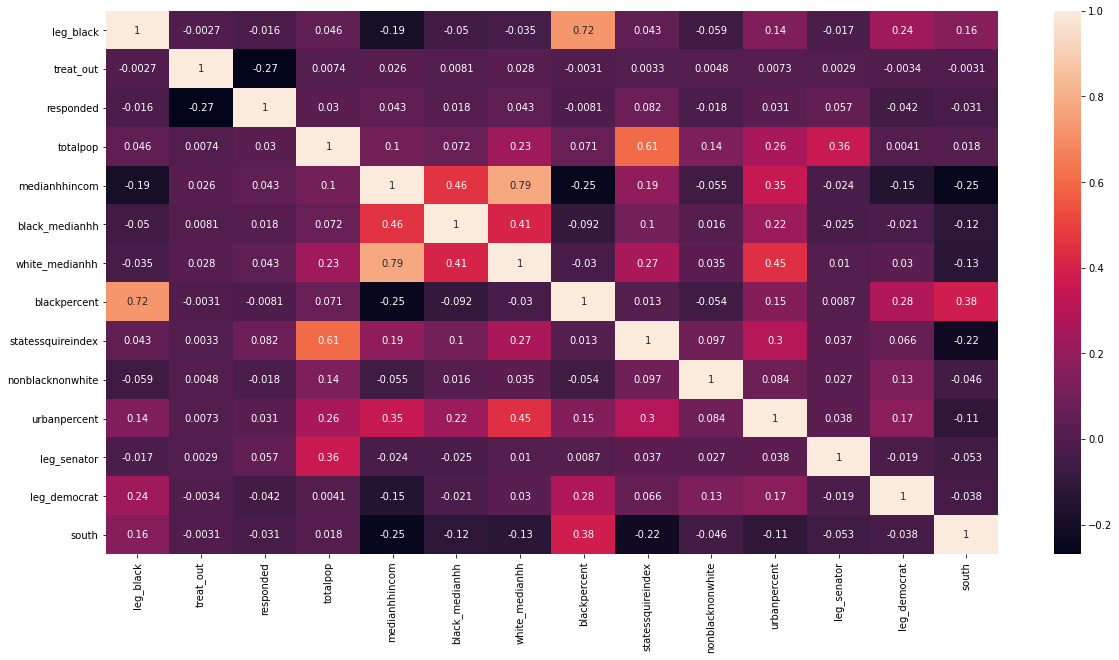

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(black.corr(), annot=True)

**Splitting dataset into train and test for evaluation**

In [ ]:
X = black.drop(columns=['responded'], axis=1)
y = black['responded']

**Selecting features that are best fit for our model using Recursive Feature Elimination**

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = .20, random_state=70)

In [ ]:
print(X_train.shape)
print(y_train.shape)

(4474, 13)
(4474,)


In [ ]:
model = LogisticRegression()

In [ ]:
log_model = model.fit(X_train, y_train)
log_model_score = model.score(X_train, y_train)
log_model_score

0.6392489941886456

**The accuracy score shows that our model has 64% chance of predicting the numbers of black legislator in southern United state, which responded to the email without extrinsic motive or motivation. And since we can't completely really rely on this accuracy as a result of the outliers which might make the model to be bias we will carryout a cross validation test to really ascertain the true score of our model**

In [ ]:
y_pred = log_model.predict(X_test)
y_pred

array([1, 0, 0, ..., 1, 0, 0])

In [ ]:
coef_result = model.coef_

**From the coefficient result it shows that there is positive and some negative relationship between the dependent and independent variable given that a percentage increase in an email being sent to black legislator there is 61% that he/she will respond to the email without extrinsic or intrinsic motive while if same email is sent to black democrat legislator there is 25% that he/she will not respond to the email without intrinsic or extrinsic motive**

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.73      0.72       655
           1       0.60      0.58      0.59       464

    accuracy                           0.67      1119
   macro avg       0.66      0.65      0.66      1119
weighted avg       0.67      0.67      0.67      1119



**The precision(60% positive and 71% non positive) score above quantifies the real percentage of black legialators in the southern united state district that received the email and responde to it without an extrinsic motive.**
**The recall shows that of all responded 58% of positive is predicted correctly**

**Cross Validation**

In [ ]:
accurancy = []
stratifiedKf_predict = StratifiedKFold(n_splits=5, shuffle=True, random_state=100)
stratifiedKf_predict.get_n_splits(X,y)

for train_index, test_index in stratifiedKf_predict.split(X_train,y_train):
   
    X1_train, X1_test = X_train.iloc[train_index], X_train.iloc[test_index]
    y1_train, y1_test = y_train.iloc[train_index], y_train.iloc[test_index]
  
    model.fit(X1_train, y1_train)
    result = model.score(X1_test, y1_test)
    accurancy.append(result)

accuracy = np.array(accurancy)

print(f' Maximum Accurancy: {accuracy.max()*100:.2f}%')
print(f' Minimum Accurancy: {accuracy.min()*100:.2f}%')
print(f' Mean Accurancy: {accuracy.mean()*100:.2}%')
print(f' Std accurancy: {accuracy.std()*100:.2f}%')

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


 Maximum Accurancy: 66.26%
 Minimum Accurancy: 62.46%
 Mean Accurancy: 6.4e+01%
 Std accurancy: 1.35%


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


**The result above shows that our model has 66% of predicting if a black legislator from southern United State will respond to email being sent without overfitting**

END OF NOTEBOOK